#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 5</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

unknownmagnitude28 = 2
unknownfrequency28 = 3
unknownphase28 =np.pi/4
unknownmagnitude29 = .02
unknownfrequency29 = 4
unknownphase29 =np.pi/2


## <font color=red>DSP.05.G5) Digitized Timeseries - Computing Magnitude from Discrete Timeseries with Noise</font>

### <font color=red>DSP.05.G5.a) Obtaining Magnitude Measures from a Digitized Timeseries with Noise</font>

Create a 30 Hz timeseries 1 second in length (gain of 2) with random noise (over a 1-second interval, a
sample is collected every 0.0025 seconds = 1/400). 

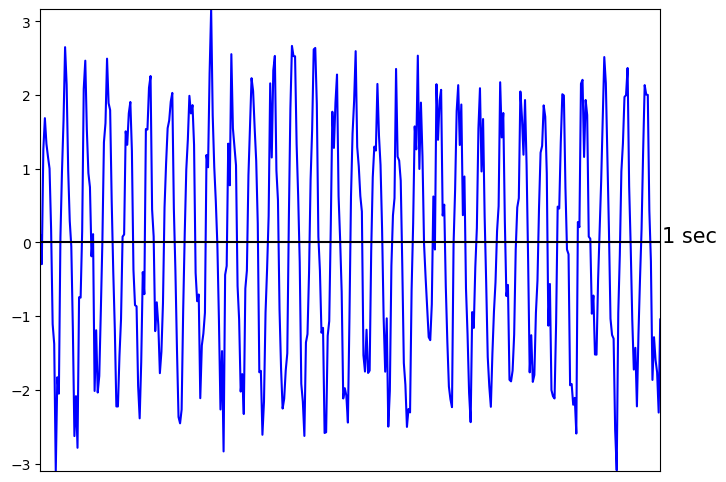

In [2]:
time = np.arange(0,1,1/400)
freq = 30
noise = np.random.normal(0,0.5,len(time))
timeseries = 2*np.sin(2*np.pi * freq * time) + noise

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The underlying 30 Hz activity is slightly distorted.

Plot the absolute values of the complex terms obtained by (2 Sin[30 x 2$π$]) $e^{i 30 x 2 π}$ as a function of x.

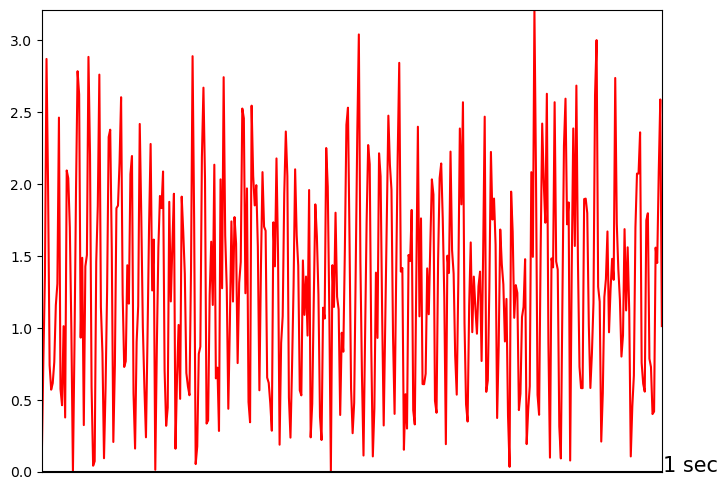

In [3]:
time = np.arange(0,1,1/400)
freq = 30
noise = np.random.normal(0,0.5,len(time))
amplitude = 2*np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 30j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Now use complex exponentials to calculate the magnitude of 30 Hz activity. Comment on why it was
very likely that, even though the signal was contaminated with noise, it is probably possible to obtain a
reliable estimate of the magnitude of 30 Hz activity.

### <font color=red>DSP.05.G5.b) Obtaining Magnitude Measures from a Digitized Timeseries with Noise</font>

Create the same 30 Hz timeseries, but this time with a gain of 1 (decreasing signal strength by 50% from the previous example).

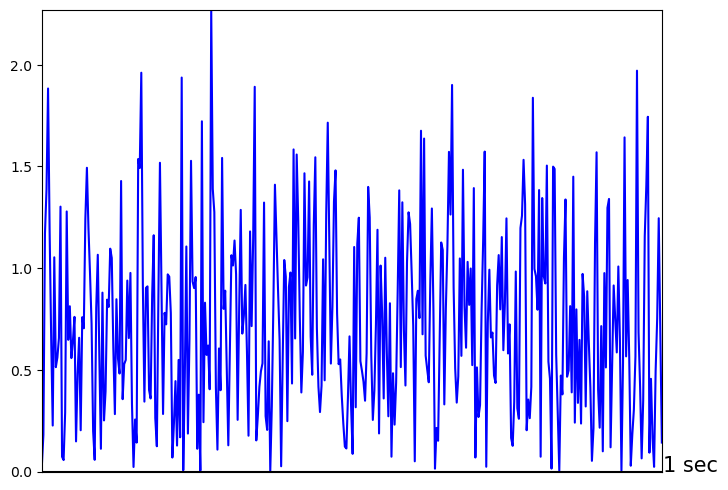

In [4]:
time = np.arange(0,1,1/400)
freq = 30
noise = np.random.normal(0,0.5,len(time))
amplitude = 1*np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 30j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The underlying 30 Hz activity is slightly more distorted. That's understandable: we cut the signal size in half and didn't change the noise, so the signal-to-noise ratio (SNR) is worse. 

Use complex exponentials to calculate the magnitude of 30 Hz activity. Comment on why it is likely that, even though the signal was contaminated with noise, it is probably possible to obtain a reliable estimate of the magnitude of 30 Hz activity.

### <font color=red>DSP.05.G5.c) Obtaining Magnitude Measures from a Digitized Timeseries with Noise</font>

Create the same 30 Hz timeseries but this time with a gain of 0.1 (decreasing signal strength by 90% from the previous example).

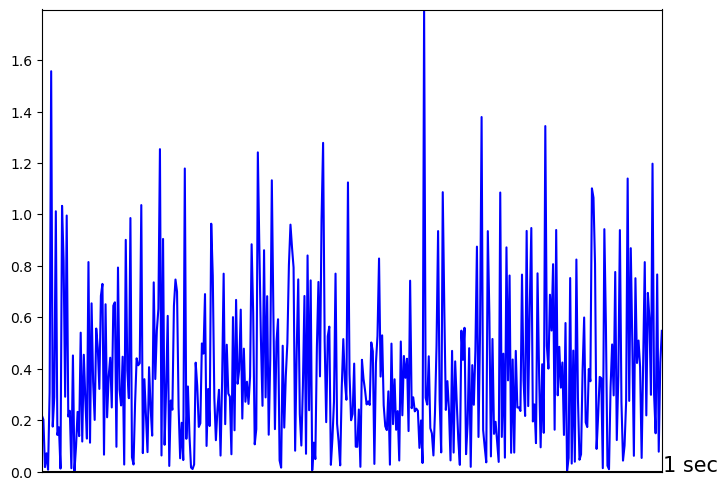

In [5]:
time = np.arange(0,1,1/400)
freq = 30
noise = np.random.normal(0,0.5,len(time))
amplitude = 0.1*np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 30j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The underlying 30 Hz activity is distorted.

Use complex exponentials to calculate the magnitude of 30 Hz activity. Do you think the magnitude
value obtained is reliable, or is the magnitude value largely a measure of noise? Don't do any calculations,
but discuss how you might determine whether the magnitude estimate is reliable.

### <font color=red>DSP.05.G5.d) Obtaining Magnitude Measures from a Digitized Timeseries with Noise</font>

Create the same 30 Hz timeseries but this time with a gain of 0.01 (decreasing signal strength by 90% from the previous example, by 99% from the example before that, and by 99.5% from the first example).

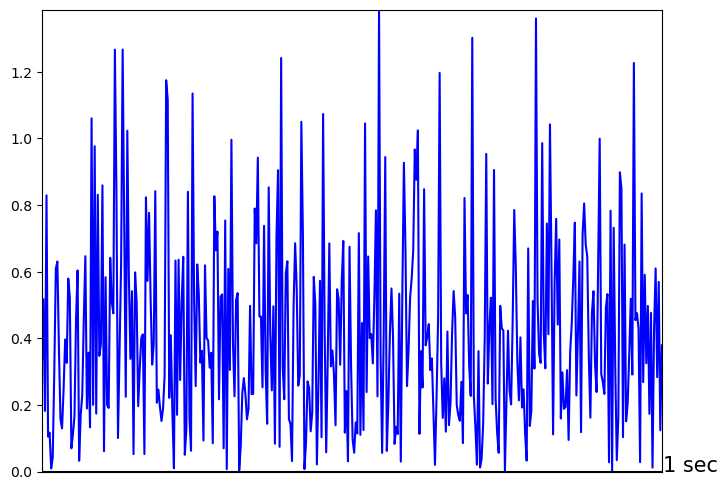

In [6]:
time = np.arange(0,1,1/400)
freq = 30
noise = np.random.normal(0,0.5,len(time))
amplitude = 0.01*np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 30j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The underlying 30 Hz activity is very distorted.

Use complex exponentials to calculate the magnitude of 30 Hz activity. Use the method applied in the
Lesson 5 Tutorial section to determine whether the 30 Hz magnitude measure is reliable (i.e., calculate a normal
distribution plot and examine where the 30 Hz magnitude measure falls on the distribution).

### <font color=red>DSP.05.G5.e) Obtaining Magnitude Measures from a Digitized Timeseries with Noise</font>

Show your stuff.

Below is a timeseries created from two frequencies (frequency, magnitude, and phase unknown) and
random noise. The sampling rate is 300 Hz (1/300 = 0.00333).

Find the frequencies that compose the timeseries and their associated phases and magnitudes. Use the method applied in the
Lesson 5 Tutorial section to determine whether the magnitude estimates are reliable.

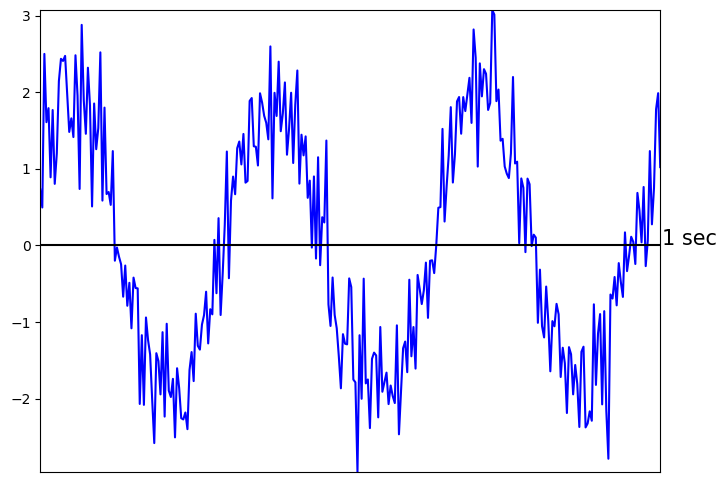

In [7]:
time = np.arange(0,1,1/300)
freq = 30
noise = np.random.normal(0,0.5,len(time))
timeseries = (unknownmagnitude28 * np.sin(2*np.pi * unknownfrequency28 * time + unknownphase28) + \
             unknownmagnitude29 * np.sin(2*np.pi *unknownfrequency29 * time + unknownphase29)) + noise 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()